In [1]:
include("..\\Code_jail\\Master_func.jl")

int_err_plot (generic function with 2 methods)

# Gauss Quadrature
## Laguerre
We try to approximate integral
$$
I = ∫_0^∞ f(x)exp(-x)dx = \sum_{i=1}^nw_if(x_i),
$$
where $x_i$ is the $i$th root of the $n$th order Laguerre polynomials $L_n$ and $w_i$ is given by
$$
w_i = \frac{x_i}{(n+1)^2[L_{n+1}(x_i)]^2}.
$$
In order to get these nodes and weights we use the three-term recurrence that the Laguerre polynomials fullfil:
$$
(n+1)L_{n+1}(x)=(2n+1-x)L_n(x)-knL_{n-1}(x).
$$
The Jacobi matrix is symmetric, so we can get the gridpoints as the eigenvalues and weights as the squared of the absolute value of the first element of the eigenvectors.


In [12]:
function Laguerre_quad(f_o,s)
    
    N = s.N
    
    f = x -> map(f_o,map(s.c,x)) .* exp(x)  .* map(s.w,x); # map to real line
    
    K = 1:N
    
    a = collect(2 .* K .- 1) 
    b = collect(-K)
    x, w, uu = grid_weight_find(a,b)
    
    res = sum(w .* map(f,x))
    
    return res
end

Laguerre_quad (generic function with 2 methods)

In [13]:
function two_sided_Laguerre_quad(f_o,s)
    
    N = s.N

    f = x -> map(f_o,map(s.c,x)) .* exp(x)  .* map(s.w,x); # map to real line
    f_oppo = x -> map(f_o,map(s.c,-x)) .* exp(x)  .* map(s.w,-x); # map to real line
    
    K = 1:N
    
    a = collect(2 .* K .- 1) 
    b = collect(-K)
    x, w, uu = grid_weight_find(a,b)
    
    res = sum(w .* map(f,x)) + sum(w .* map(f_oppo,x))
    
    return res
end

two_sided_Laguerre_quad (generic function with 2 methods)

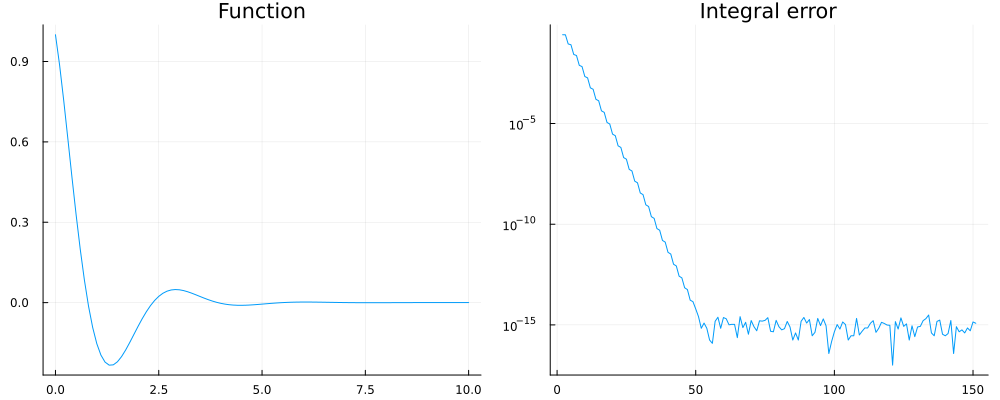

In [14]:
a = 2; f = x -> cos(a*x).*exp(-abs.(x)); true_res = (2/(a^2+1))
s = curv(x -> x, 0,10,x->1,10)
int_err_plot(Laguerre_quad,f,true_res/2,s, 150)

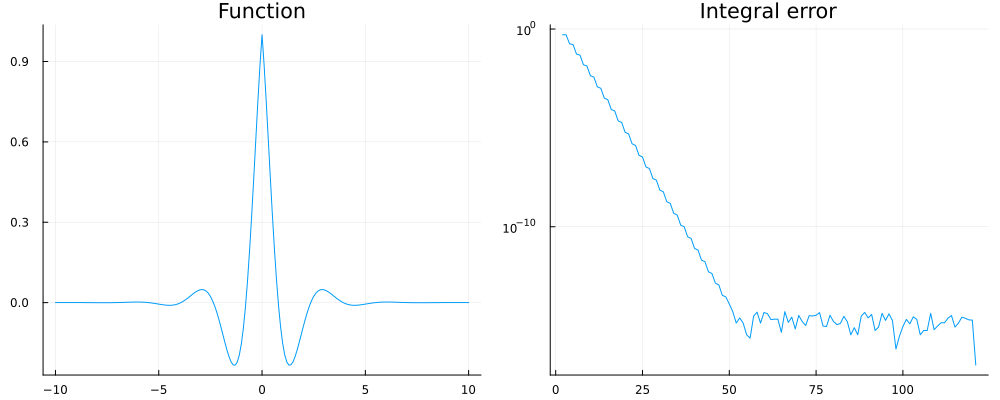

In [15]:
s = curv(x -> x, -10,10,x->1,10)
int_err_plot(two_sided_Laguerre_quad,f,true_res,s,120)

## Hermite
We try to approximate integral
$$
I = ∫_{-∞}^∞ f(x)exp(-x^2)dx = \sum_{i=1}^nw_if(x_i),
$$
where $x_i$ is the $i$th root of the $n$th order Hermite polynomials $H_n$ and $w_i$ is given by
$$
w_i = \frac{2^{n-1}n!\sqrt{π}}{(n)^2[H_{n-1}(x_i)]^2}.
$$
Everything about this is problematic, so let's go to the Jacobi. We have the three-term recurrence:
$$
\frac{1}{2}H_{n+1} = x H_n-nH_{n-1}.
$$
This is not symmetric, so our eigenvectors will not correspond to the weights. We use similarity transforms to get it symmetric. After a little bit of fucking around and finding out, we use similarity matrix $S_{jj}=\left(\sqrt{2^{j-1}(j-1)!}\right)^{-1}$. Using this similarity transform, we get that the Jacobi matrix only has elements $\sqrt{j/2} on the off-diagonal. Note that this quadrature would transform the function $f(x)=1$ onto $1$. However, $∫_{-∞}^∞ exp(-x^2)dx=\sqrt{π}$. Therefore, we multiply the weights by $\sqrt{π}$.


In [16]:
function Hermite_quad(f_o,s)

    N = s.N
    
    f = x -> map(f_o,map(s.c,x)) .* exp(x .^ 2)  .* map(s.w,x); # map to real line

    a = zeros(N);
    b = sqrt.((1:N) ./ 2)
    x, w, uu = grid_weight_find(a,b)
    
    w *= sqrt(pi) # multiply by int of e^(-x^2)

    res = sum(w .* map(f,x))
    
    return res
end

Hermite_quad (generic function with 2 methods)

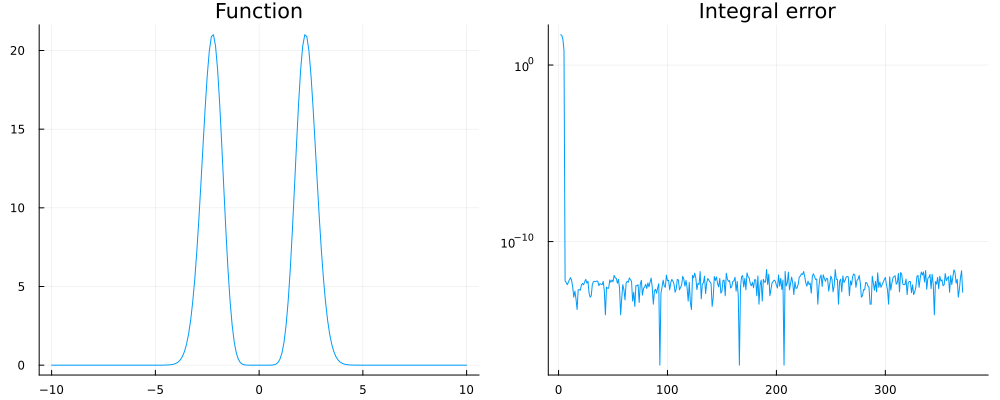

In [17]:
f = x -> x.^10 .* exp(-x.^2); true_res = 945*sqrt(π)/32
#a = 100; f = x -> cos(a*x).*exp(-x.^2); true_res = sqrt(pi)*exp(-a^2/4)
int_err_plot(Hermite_quad,f,true_res,s,1200)